# Skripsi Analisis Sentiment

## Import data ke dalam jupyter

Tahap pertama kita akan memanggil library yang dibutuhkan untuk melakukan analisis sentimen menggunakan LSTM. Library yang dibutuhkan antara lain pandas untuk membaca file csv kemudian ada keras dan tensorflow untuk *deep learning* lalu ada matplotlib dan seaborn untuk visualisasi dan lain-lain.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import keras
import swifter
import tensorflow as tf
import gensim
from sklearn.metrics import confusion_matrix
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize.treebank import TreebankWordDetokenizer
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam,SGD
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

Tahap kedua kita panggil datasetnya menggunakan library pandas

In [2]:
df = pd.read_csv('Hasil Preproses 1.csv', error_bad_lines = False)
pd.set_option('max_colwidth', None)
df.head(10)

,waktu,tweet,sentiment
0,2021-08-16 23:55:42,"['ayo', 'warga', 'tulungagung', 'daftar', 'ikut', 'vaksin', 'syarat', 'lampir', 'rabu', 'agustus']",positive
1,2021-08-16 23:54:58,"['daftar', 'vaksin', 'ayo', 'lupa', 'warga', 'tulungagung', 'ikut', 'vaksin', 'syarat']",positive
2,2021-08-16 23:50:56,['gas'],neutral
3,2021-08-16 23:47:46,"['satgas', 'masyarkat', 'khawatir', 'syarat', 'vaksin', 'umrah']",neutral
4,2021-08-16 23:47:29,"['vaksin', 'covid', 'bukti', 'turun', 'risiko', 'mati', 'nakes']",positive
5,2021-08-16 23:46:59,"['jalan', 'vaksin', 'lancar', 'sebentar', 'ingat', 'merdeka', 'ada']",neutral
6,2021-08-16 23:45:56,"['jerman', 'suntik', 'juta', 'dosis', 'vaksin', 'covid', 'inggris', 'juta', 'dosis', 'vaksin', 'covid']",neutral
7,2021-08-16 23:44:19,"['our', 'world', 'in', 'data', 'lapor', 'populasi', 'dunia', 'terima', 'dosis', 'vaksin', 'covid', 'vaksinasi']",neutral
8,2021-08-16 23:43:58,"['dasar', 'grafik', 'china', 'tempat', 'urut', 'negara', 'suntik', 'vaksin', 'covid']",neutral
9,2021-08-16 23:42:50,"['indonesia', 'tempat', 'peringkat', 'negara', 'suntik', 'vaksin', 'covid', 'agustus', 'peringkat']",neutral


Kemudian kita akan lihat jumlah data yang terdapat pada dataset yang telah dimasukan ke dalam program

In [ ]:
len(df)

Lalu kita akan melihat apakah dataset tersebut memiliki data yang duplikat dan kosong

In [ ]:
df[df.duplicated(keep='last')]

In [ ]:
df[df.isna().values.any(axis=1)]

In [ ]:
df['sentiment'].unique()

In [ ]:
df.groupby('sentiment').nunique()

In [ ]:
len(df)

## Memvisualisasi Data

Pada tahapan ini, kita akan mevisualisasikan data dari dataset yang telah dimasukan kedalam program menggunakan library **Matplotlib** dan **Seaborn**. Visualisasi data tersebut divisualisasikan menggunakan grafik, histogram, dan wordcloud.

In [ ]:
fig = px.histogram(df, x="sentiment", title="Jumlah Sentiment")
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [ ]:
wr = pd.read_csv('Data Wordcloud.csv', error_bad_lines = False)

In [ ]:
wr['sentiment'] = wr['sentiment'].replace('positive', 2)
wr['sentiment'] = wr['sentiment'].replace('negative', 0)
wr['sentiment'] = wr['sentiment'].replace('neutral', 1)

In [ ]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("WordCloud Kata Yang Muncul", fontsize = 15)

In [ ]:
normal_words =' '.join([text for text in wr['tweet'][wr['sentiment'] == 1]])

wordcloud = WordCloud(background_color = 'white',width=1920, height=1080, random_state=5, max_font_size = 500).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

In [ ]:
positive_words =' '.join([text for text in wr['tweet'][wr['sentiment'] == 2]])

wordcloud = WordCloud(background_color = 'white',width=800, height=500, random_state=5, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [ ]:
positive_words =' '.join([text for text in wr['tweet'][wr['sentiment'] == 0]])

wordcloud = WordCloud(background_color = 'white',width=800, height=500, random_state=5, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

## PREPROCESSING DATA

### CASE FOLDING

In [ ]:
data['tweet'] = data['tweet'].str.lower()
print(data['tweet'])

### TOKENIZING

In [ ]:
#NLTK word tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)
data['tweet'] = data['tweet'].apply(word_tokenize_wrapper)
print(data['tweet'])

### STOPWORD REMOVAL

In [ ]:
list_stopwords = stopwords.words('indonesian')

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]
data['tweet'] = data['tweet'].apply(stopwords_removal)
print(data['tweet'])

### STEMMING

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data['tweet']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['tweet'] = data['tweet'].swifter.apply(get_stemmed_term)
print(data['tweet'])

In [ ]:
print(tweet)

### LABEL ENCODING

In [2]:
data = pd.read_csv('Hasil Preproses 1.csv', error_bad_lines = False)

In [3]:
tweet = data['tweet']

In [4]:
labels = np.array(data['sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'negative':
        y.append(0)
    if labels[i] == 'neutral':
        y.append(1)
    if labels[i] == 'positive':
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="int64")
del y

In [5]:
len(labels)

2275

### PROSES DATA

In [6]:
temp = []
#Splitting pd.Series to list
data_to_list = tweet.values.tolist()
for i in range(len(data_to_list)):
    temp.append((data_to_list[i]))
list(temp[:10])

["['ayo', 'warga', 'tulungagung', 'daftar', 'ikut', 'vaksin', 'syarat', 'lampir', 'rabu', 'agustus']",
 "['daftar', 'vaksin', 'ayo', 'lupa', 'warga', 'tulungagung', 'ikut', 'vaksin', 'syarat']",
 "['gas']",
 "['satgas', 'masyarkat', 'khawatir', 'syarat', 'vaksin', 'umrah']",
 "['vaksin', 'covid', 'bukti', 'turun', 'risiko', 'mati', 'nakes']",
 "['jalan', 'vaksin', 'lancar', 'sebentar', 'ingat', 'merdeka', 'ada']",
 "['jerman', 'suntik', 'juta', 'dosis', 'vaksin', 'covid', 'inggris', 'juta', 'dosis', 'vaksin', 'covid']",
 "['our', 'world', 'in', 'data', 'lapor', 'populasi', 'dunia', 'terima', 'dosis', 'vaksin', 'covid', 'vaksinasi']",
 "['dasar', 'grafik', 'china', 'tempat', 'urut', 'negara', 'suntik', 'vaksin', 'covid']",
 "['indonesia', 'tempat', 'peringkat', 'negara', 'suntik', 'vaksin', 'covid', 'agustus', 'peringkat']"]

In [7]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
data_words = list(sent_to_words(temp))

print(data_words[:10])

[['ayo', 'warga', 'tulungagung', 'daftar', 'ikut', 'vaksin', 'syarat', 'lampir', 'rabu', 'agustus'], ['daftar', 'vaksin', 'ayo', 'lupa', 'warga', 'tulungagung', 'ikut', 'vaksin', 'syarat'], ['gas'], ['satgas', 'masyarkat', 'khawatir', 'syarat', 'vaksin', 'umrah'], ['vaksin', 'covid', 'bukti', 'turun', 'risiko', 'mati', 'nakes'], ['jalan', 'vaksin', 'lancar', 'sebentar', 'ingat', 'merdeka', 'ada'], ['jerman', 'suntik', 'juta', 'dosis', 'vaksin', 'covid', 'inggris', 'juta', 'dosis', 'vaksin', 'covid'], ['our', 'world', 'in', 'data', 'lapor', 'populasi', 'dunia', 'terima', 'dosis', 'vaksin', 'covid', 'vaksinasi'], ['dasar', 'grafik', 'china', 'tempat', 'urut', 'negara', 'suntik', 'vaksin', 'covid'], ['indonesia', 'tempat', 'peringkat', 'negara', 'suntik', 'vaksin', 'covid', 'agustus', 'peringkat']]


In [8]:
len(data_words)

2275

In [9]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [10]:
data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:10])

['ayo warga tulungagung daftar ikut vaksin syarat lampir rabu agustus', 'daftar vaksin ayo lupa warga tulungagung ikut vaksin syarat', 'gas', 'satgas masyarkat khawatir syarat vaksin umrah', 'vaksin covid bukti turun risiko mati nakes', 'jalan vaksin lancar sebentar ingat merdeka ada', 'jerman suntik juta dosis vaksin covid inggris juta dosis vaksin covid', 'our world in data lapor populasi dunia terima dosis vaksin covid vaksinasi', 'dasar grafik china tempat urut negara suntik vaksin covid', 'indonesia tempat peringkat negara suntik vaksin covid agustus peringkat']


In [11]:
data = np.array(data)

### MENGUBAH TEKS MENJADI ANGKA

In [12]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  554  678   22]
 [   0    0    0 ...   50    1   38]
 [   0    0    0 ...    0    0 1065]
 ...
 [   0    0    0 ...  159    4    1]
 [   0    0    0 ...  787   17    2]
 [   0    0    0 ... 1037  520  244]]


In [13]:
embedding_layer = Embedding(1000, 64)

In [14]:
print(embedding_layer)

In [15]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(tweets,labels,test_size=0.2,random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

print("y_train",y_train.shape)
print("y_test",y_test.shape)

1820 455 1820 455
y_train (1820, 3)
y_test (455, 3)


In [111]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(20,dropout = 0.5,recurrent_dropout=0.5))
model1.add(layers.Dense(3, activation='softmax'))
model1.summary()


model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto',period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, epochs=50,batch_size=28,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 20)          100000    
_________________________________________________________________
lstm_11 (LSTM)               (None, 20)                3280      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 63        
Total params: 103,343
Trainable params: 103,343
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
65/65 [==============================] - 14s 129ms/step - loss: 1.0663 - accuracy: 0.4572 - val_loss: 1.0113 - val_accuracy: 0.4615

Epoch 00001: val_accuracy improved from -inf to 0.46154, saving model to best_model1.hdf5
Epoch 2/50
65/65 [==============================] - 7s 108ms/step - loss: 0.9513 - accuracy: 0.5330 - val_loss: 0.8391 - val_accuracy: 0.6923



In [ ]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.57,recurrent_dropout=0.57)))
model2.add(layers.Dense(3,activation='softmax'))
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=40,batch_size=28,validation_data=(X_test, y_test),callbacks=[checkpoint2])

## MENYIMPAN MODEL

In [112]:
best_model = keras.models.load_model("best_model1.hdf5")

## EVALUASI MODEL

In [113]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

15/15 - 2s - loss: 0.3415 - accuracy: 0.8967
Model accuracy:  0.89670330286026


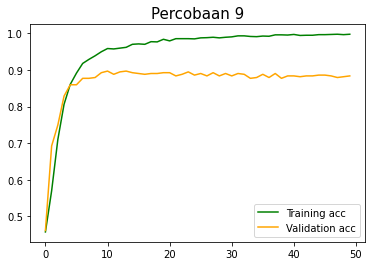

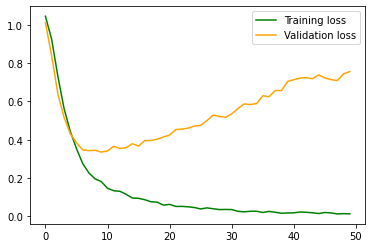

In [114]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'orange', label='Validation acc')
plt.title('Percobaan 9', fontsize=15)
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.legend()
 
plt.show()

## CONFUSION MATRIX

In [118]:
predictions = best_model.predict(X_train)

In [119]:
matrix = confusion_matrix(y_train.argmax(axis=1), predictions.argmax(axis=1))

Text(114.0, 0.5, 'Actual')

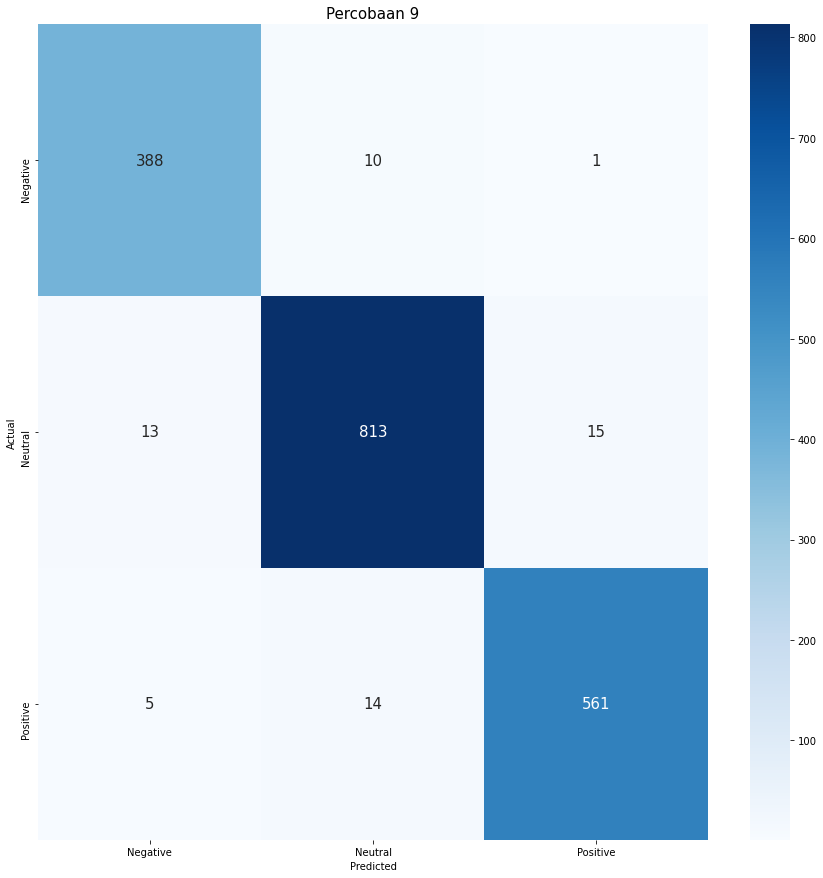

In [120]:
conf_matrix = pd.DataFrame(matrix, index = ['Negative','Neutral','Positive'],columns = ['Negative','Neutral','Positive'])

plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15}, cmap='Blues', fmt='g')
plt.title('Percobaan 9', fontsize = 15)
plt.xlabel("Predicted")
plt.ylabel("Actual")

## PENGUJIAN MODEL

In [ ]:
sentiment = ['Negative','Neutral','Positive']

In [ ]:
sequence = tokenizer.texts_to_sequences(['Yang bisa dibuat Kadrun adalah vaksin RABIES. Pantesan kelakuan mereka persis seperti ANJING GILA.'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:
sequence = tokenizer.texts_to_sequences(['Politisasi vaksin.Vaksin itu untuk pencegahan mengurangi resiko jika terpapar virus. karena benci rezim, tidak bisa bedakan antara politik dengan kesehatan dan lainnya. Dikiranya vaksin bertujuan untuk mematikan oposisi.'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:
sequence = tokenizer.texts_to_sequences(['BIN Gelar Vaksinasi Covid-19 untuk Pelajar SMP-SMA'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:
'red' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [ ]:
Percobaan 1 nilai epoch 30 nilai layer 10 = 89.01%
Percobaan 2 nilai epoch 30 nilai layer 15 = 89.23%
Percobaan 3 nilai epoch 30 nilai layer 20 = 89.23%
Percobaan 4 nilai epoch 40 nilai layer 10 = 89.01%
Percobaan 5 nilai epoch 40 nilai layer 15 = 89.23%
Percobaan 6 nilai epoch 40 nilai layer 20 = 89.23%
Percobaan 7 nilai epoch 50 nilai layer 10 = 89.23%
Percobaan 8 nilai epoch 50 nilai layer 15 = 89.89%
Percobaan 9 nilai epoch 50 nilai layer 20 = 89.67%